In [3]:
%load_ext autoreload
%autoreload 2
import sys, os, platform
import os
import sys
module_path = os.path.abspath(os.path.join('../spectraltree'))
if module_path not in sys.path:
    sys.path.append(module_path)
sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'spectraltree'))
sys.path.append(os.path.join(sys.path[0],'spectraltree'))
import pickle
import reconstruct_tree as rt
import utils
import generation
import compare_methods
import numpy as np
from dendropy.interop import raxml
from dendropy.model.discrete import simulate_discrete_chars, Jc69
from dendropy.calculate.treecompare import symmetric_difference
import seaborn as sns
import matplotlib.pylab as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#m_vec = [16,20]
m_vec = np.repeat([64, 128, 256, 512, 1024],10)
print("m_vec: ",m_vec)
tree_list = [utils.unrooted_pure_kingman_tree(utils.default_namespace(m), m) for m in m_vec]
jc = generation.Jukes_Cantor()
delta_vec = np.arange(0.95,0.96,0.01)
print("Delta vec:", delta_vec)
NJ = rt.NeighborJoining(rt.JC_similarity_matrix)
SNJ = rt.SpectralNeighborJoining(rt.JC_similarity_matrix)
RAxML = rt.RAxML()
spectral = rt.SpectralTreeReconstruction(rt.RAxML,rt.JC_similarity_matrix)
methods = [spectral, RAxML, NJ,SNJ]
mutation_rates = [jc.similarity2t(delta)  for delta in delta_vec]
Ns = [1000]
results = compare_methods.experiment(tree_list = tree_list, sequence_model = jc, Ns = Ns, methods=methods,\
                                     savepath = '20200228_compare_methods_coalescent.pkl',folder = '../data/',mutation_rates = mutation_rates, reps_per_tree=1)




m_vec:  [  64   64   64   64   64   64   64   64   64   64  128  128  128  128
  128  128  128  128  128  128  256  256  256  256  256  256  256  256
  256  256  512  512  512  512  512  512  512  512  512  512 1024 1024
 1024 1024 1024 1024 1024 1024 1024 1024]
Delta vec: [0.95 0.96]
==== Beginning Experiment =====
	 Transition:  Jukes Cantor
	 50 trees
	 1 sample sizes: 1000
	 4 methods <reconstruct_tree.SpectralTreeReconstruction object at 0x7fc797c1a5c0> <reconstruct_tree.RAxML object at 0x7fc797c1a588> <reconstruct_tree.NeighborJoining object at 0x7fc7a1297f98> <reconstruct_tree.SpectralNeighborJoining object at 0x7fc797c1a4e0>
	 2 mutation rates: 0.0128 0.0102
	 1 reps
Successfully read 0 files.
1 / 400
2 / 400
3 / 400
4 / 400
5 / 400
6 / 400
7 / 400
8 / 400
9 / 400
10 / 400
11 / 400
12 / 400
13 / 400
14 / 400
15 / 400
16 / 400
17 / 400
18 / 400
19 / 400
20 / 400
21 / 400
22 / 400
23 / 400
24 / 400
25 / 400
26 / 400
27 / 400
28 / 400
29 / 400
30 / 400
31 / 400
32 / 400
33 / 400
3

In [26]:
import pickle

f = open('../data/coal_m_256_scan_delta.pckl', 'wb')
pickle.dump(results, f)
f.close()

In [8]:
f = open('../data/coal_m_256_scan_delta.pckl','rb')
results = pickle.load(f)

delta
0.95    3
0.96    3
Name: RF, dtype: int64


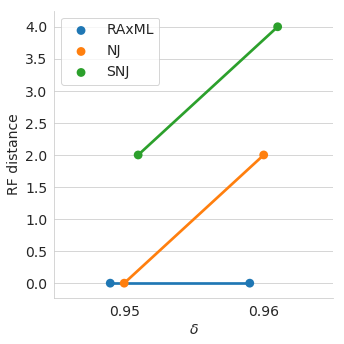

In [6]:
jc = generation.Jukes_Cantor()
df = compare_methods.results2frame(results)
df['delta'] = np.round((1-4/3*df['rate'])**3,2)
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 14})
h = compare_methods.accuracy(df,x="delta",y="RF")
#h.set(ylim=(-10,300))
new_labels = ['RAxML','NJ', 'SNJ']
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, new_labels)
plt.ylabel('RF distance')
plt.xlabel(r'$\delta$')
plt.savefig('../data/coalescent_delta_scan_m_256_n_1000.eps',format='eps')